## HYPOTHESIS ##

What are the chances of each team (Mainly Barcelona) winning based on the trends and patterns from last 2 decades.

1. Who is more likely to win?
2. Teams that are most likely to qualify for the UCL (top 4 teams), excluding cdr winners
3. Teams that are likely to face relegation
4. Team that will play confrence league

## IMPORTING FILES AND DATA PREPARATION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, log_loss, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('LA_LIGA_2_decades_df.csv')
df.shape

(400, 21)

In [6]:
df.head(5)

,RK,SQUAD,MP,W,D,L,GF,GA,GD,PTS,...,XG,XGA,XGD,XGD/90,LAST 5,ATTENDANCE,TOP TEAM SCORER,GOALKEEPER,NOTES,SEASON
0,1,Barcelona,31,22,4,5,84,29,55,70,...,73.6,31.8,41.8,1.35,W W W D W,45270.0,Robert Lewandowski - 25,Iñaki Peña,NaN,2024-2025
1,2,Real Madrid,31,20,6,5,64,31,33,66,...,60.3,32.4,27.9,0.90,W W W L W,70146.0,Kylian Mbappé - 22,Thibaut Courtois,NaN,2024-2025
2,3,Atlético Madrid,30,17,9,4,49,24,25,60,...,47.4,28.2,19.2,0.64,W L L D W,61970.0,Julián Álvarez - 12,Jan Oblak,NaN,2024-2025
3,4,Athletic Club,31,15,12,4,49,25,24,57,...,45.7,29.7,16.0,0.52,D W D D W,48380.0,Oihan Sancet - 15,Unai Simón,NaN,2024-2025
4,5,Villarreal,30,14,9,7,53,40,13,51,...,52.4,33.6,18.9,0.63,L L W D W,18588.0,Ayoze Pérez - 13,Diego Conde,NaN,2024-2025


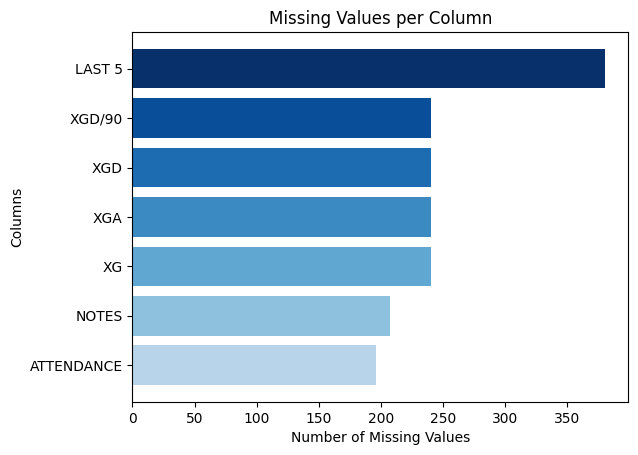

In [10]:
# Cheking for missing values in each column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts= missing_counts.sort_values(ascending=True)
colors = plt.cm.Blues(np.linspace(0.3, 1, len(missing_counts)))

bars = plt.barh(missing_counts.index, missing_counts.values, color=colors)
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values per Column')

plt.show()

There are some missing values in some columns, luckily we don't really need these columns in particular for our analysis, so lets drop them

In [ ]:
df = df.drop(missing_counts.index,axis=1)
df.head(3)

,RK,SQUAD,MP,W,D,L,GF,GA,GD,PTS,PTS/MP,TOP TEAM SCORER,GOALKEEPER,SEASON
0,1,Barcelona,31,22,4,5,84,29,55,70,2.26,Robert Lewandowski - 25,Iñaki Peña,2024-2025
1,2,Real Madrid,31,20,6,5,64,31,33,66,2.13,Kylian Mbappé - 22,Thibaut Courtois,2024-2025
2,3,Atlético Madrid,30,17,9,4,49,24,25,60,2.00,Julián Álvarez - 12,Jan Oblak,2024-2025


## EDA
How many teams have played in LA LIGA in past 2 decades? 

In [18]:
team_appearance = df['SQUAD'].value_counts()

print(f"There have been {team_appearance.shape[0]} unique teams that have participated in LA LIGA in past 2 decades")

print(team_appearance.head(6))
print(team_appearance.tail(3))

There have been 40 unique teams that have participated in LA LIGA in past 2 decades
SQUAD
Barcelona          20
Valencia           20
Real Madrid        20
Sevilla            20
Atlético Madrid    20
Athletic Club      20
Name: count, dtype: int64
SQUAD
Numancia       1
Real Murcia    1
Gimnàstic      1
Name: count, dtype: int64


There have been 40 different teams that have played La Liga in the past 2 decades. Now lets see which teams have been consistent (played in all the seasons) in this period

In [16]:
consistent_teams = team_appearance[team_appearance.values == 20]
print(f"{consistent_teams}")

SQUAD
Barcelona          20
Valencia           20
Real Madrid        20
Sevilla            20
Atlético Madrid    20
Athletic Club      20
Name: count, dtype: int64


The Big 6 Teams in Spain (in terms of consistency in the league) have been:
1. Barcelona
2. Real Madrid
3. Atheletico Madrid
4. Sevilla
5. Valencia
6. Atheletic Club

### Now that we know which were the most consistent teams to play every season in the past 2 decades, Let us look at their rankings

In [7]:
top_3 = df[df['RK']<4]
top_3['SQUAD'].groupby(top_3['RK']).value_counts()

RK  SQUAD          
1   Barcelona          11
    Real Madrid         7
    Atlético Madrid     2
2   Real Madrid        10
    Barcelona           7
    Atlético Madrid     2
    Villarreal          1
3   Atlético Madrid     8
    Valencia            4
    Real Madrid         3
    Barcelona           2
    Sevilla             2
    Girona              1
Name: count, dtype: int64

In [8]:
bottom_3 = df[df['RK']>17]
print(bottom_3.shape[0])
bottom_3['SQUAD'].groupby(bottom_3['RK']).value_counts()

60


RK  SQUAD         
18  La Coruña         2
    Valladolid        2
    Alavés            1
    Betis             1
    Celta Vigo        1
    Cádiz             1
    Eibar             1
    Girona            1
    Granada           1
    Huesca            1
    Las Palmas        1
    Leganés           1
    Mallorca          1
    Osasuna           1
    Rayo Vallecano    1
    Sporting Gijón    1
    Villarreal        1
    Zaragoza          1
19  Valladolid        2
    Almería           2
    Osasuna           1
    Real Murcia       1
    Real Sociedad     1
    Sporting Gijón    1
    Tenerife          1
    Mallorca          1
    Numancia          1
    Leganés           1
    Levante           1
    Cádiz             1
    Espanyol          1
    Getafe            1
    Huesca            1
    Hércules          1
    La Coruña         1
    Las Palmas        1
20  Málaga            2
    Levante           2
    Granada           2
    Betis             1
    Alavés           

### Let us subset the data and try to find what the average points look like each season for the first team.

In [1]:
winners = df[(df['RK']==1) & (df['SEASON']!= '2024-2025')]
winners = winners[['RK','SQUAD','PTS','PTS/MP','GD','SEASON']].sort_values("SEASON")

NameError: name 'df' is not defined

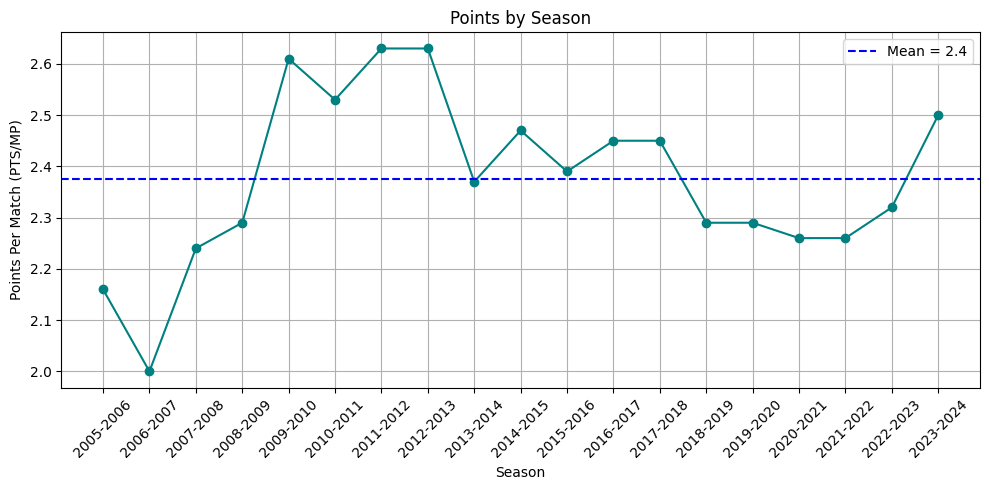

In [10]:
mean_pts = winners['PTS/MP'].mean()
plt.figure(figsize=(10, 5))
plt.plot(winners['SEASON'], winners['PTS/MP'], marker='o', linestyle='-', color='teal')
plt.axhline(y=mean_pts, color='blue', linestyle='--', label=f'Mean = {mean_pts:.1f}')
plt.xlabel('Season')
plt.ylabel('Points Per Match (PTS/MP)')
plt.title('Points by Season')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that the points per match required to win the championship have dropped since the year 2018 onwards, bars to win LaLiga were significanlty lower as some of football's most iconic players retiring or moving to other leagues. However, the last season seems to be very competitive again with 2.5 points per game.

In [11]:
df[(df['SEASON']=='2024-2025') & (df['RK'].isin([1,2]))][['SQUAD','PTS/MP']]

,SQUAD,PTS/MP
0,Barcelona,2.26
1,Real Madrid,2.13


Barcelona is pretty close to the avg pts/game needed to win La Liga in the past 20 years, Madrid on the other hand is still pretty close to cover this gap. 

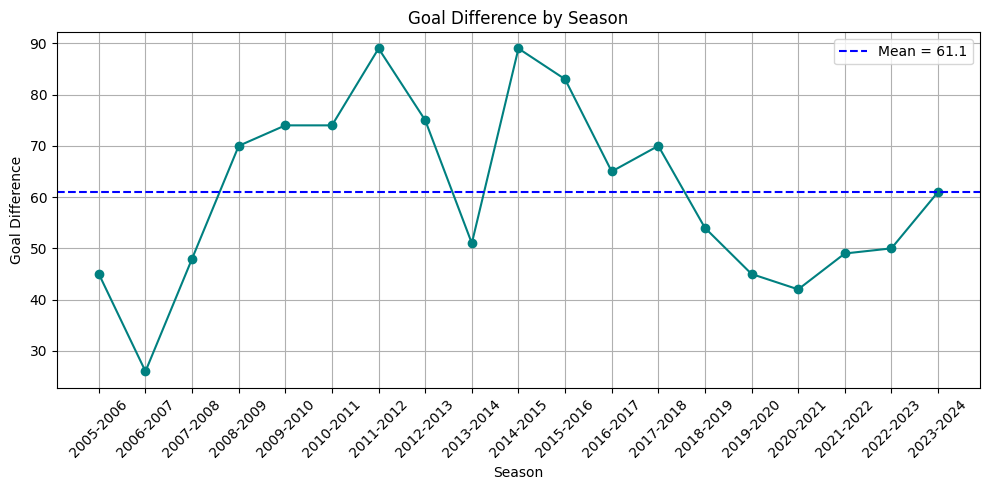

In [12]:
mean_pts = winners['GD'].mean()
plt.figure(figsize=(10, 5))
plt.plot(winners['SEASON'], winners['GD'], marker='o', linestyle='-', color='teal')
plt.axhline(y=mean_pts, color='blue', linestyle='--', label=f'Mean = {mean_pts:.1f}')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.title('Goal Difference by Season')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The goal difference is very identical to the Points or Points per match, thus the higher the goal difference the more likely a team is to win.

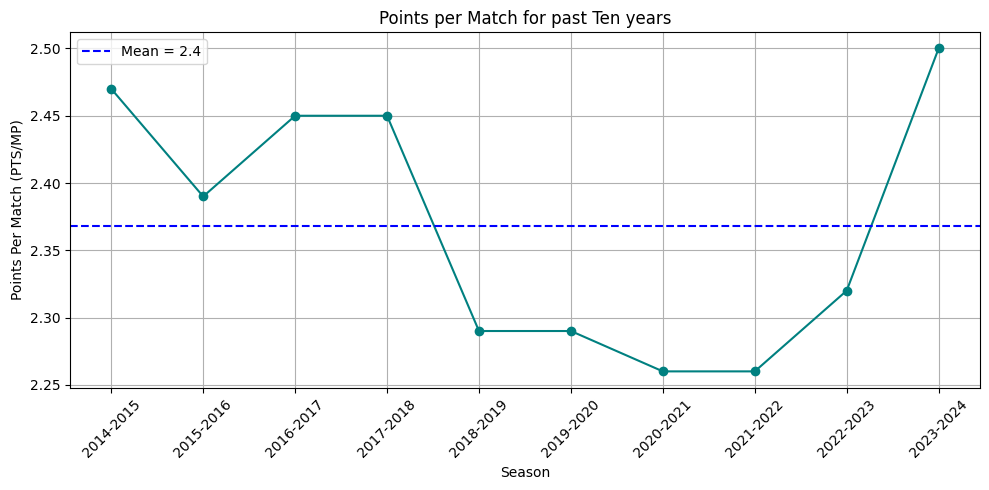

In [13]:
past_ten_winners = winners[winners['SEASON']>='2014-2015'] 
mean_pts = past_ten_winners['PTS/MP'].mean()

plt.figure(figsize=(10, 5))
plt.plot(past_ten_winners['SEASON'], past_ten_winners['PTS/MP'], marker='o', linestyle='-', color='teal')
plt.axhline(y=mean_pts, color='blue', linestyle='--', label=f'Mean = {mean_pts:.1f}')
plt.xlabel('Season')
plt.ylabel('Points Per Match (PTS/MP)')
plt.title('Points per Match for past Ten years')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

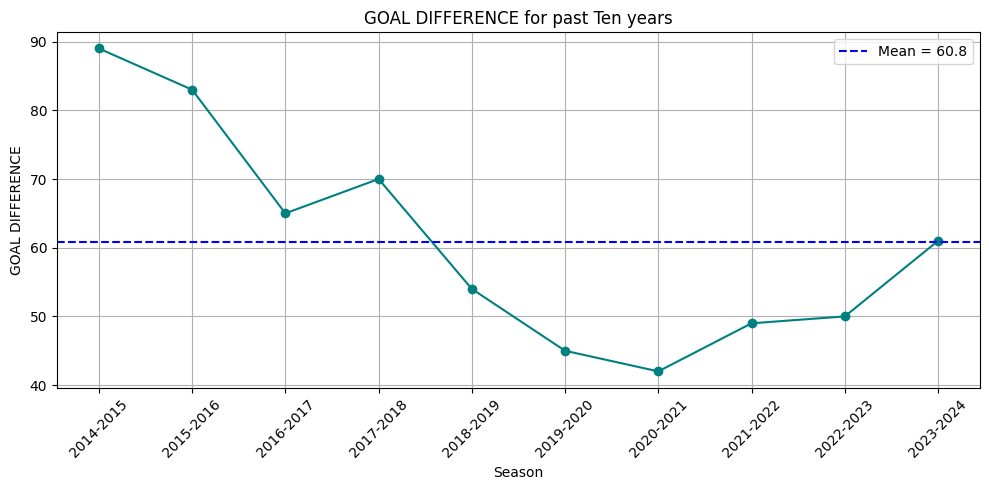

In [14]:
mean_GD = past_ten_winners['GD'].mean()

plt.figure(figsize=(10, 5))
plt.plot(past_ten_winners['SEASON'], past_ten_winners['GD'], marker='o', linestyle='-', color='teal')
plt.axhline(y=mean_GD, color='blue', linestyle='--', label=f'Mean = {mean_GD:.1f}')
plt.xlabel('Season')
plt.ylabel('GOAL DIFFERENCE')
plt.title('GOAL DIFFERENCE for past Ten years')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

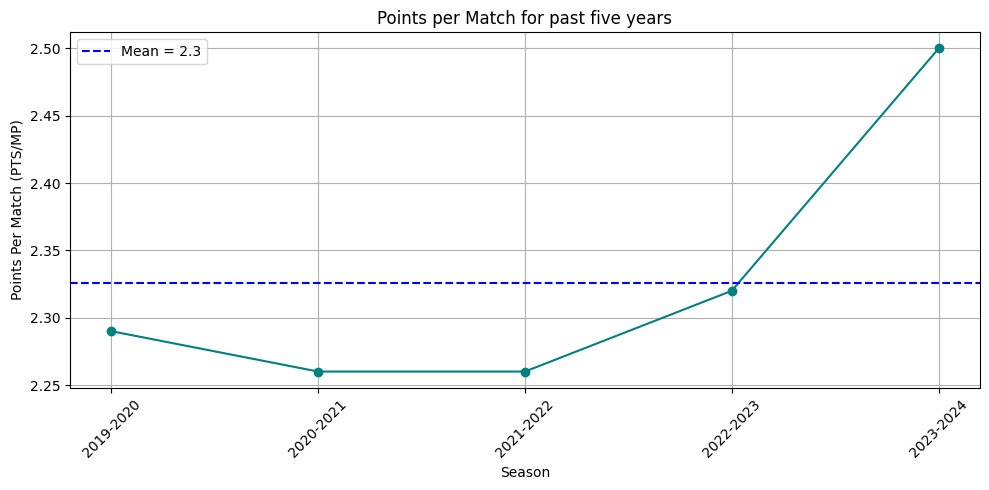

In [15]:
past_five_winners = winners[winners['SEASON']>='2019-2020'] 
mean_pts = past_five_winners['PTS/MP'].mean()
plt.figure(figsize=(10, 5))
plt.plot(past_five_winners['SEASON'], past_five_winners['PTS/MP'], marker='o', linestyle='-', color='teal')
plt.axhline(y=mean_pts, color='blue', linestyle='--', label=f'Mean = {mean_pts:.1f}')
plt.xlabel('Season')
plt.ylabel('Points Per Match (PTS/MP)')
plt.title('Points per Match for past five years')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

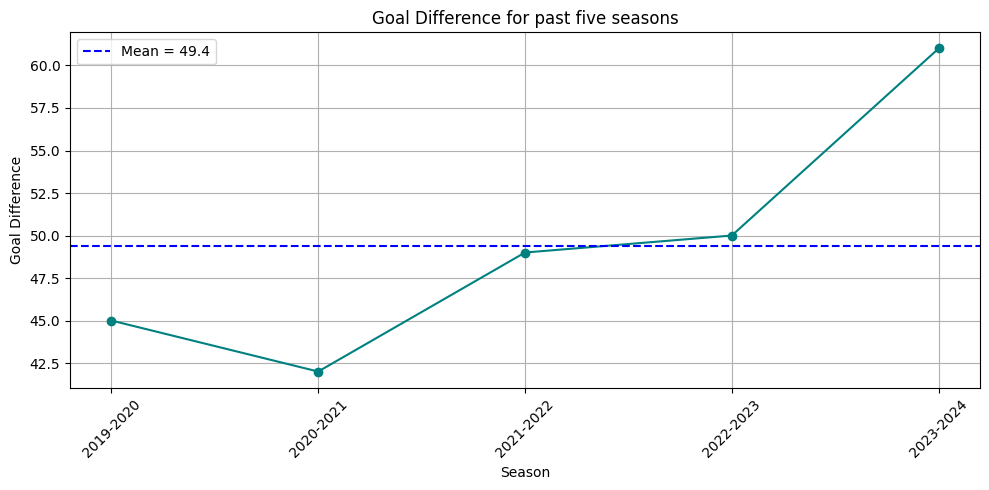

In [16]:
mean_pts = past_five_winners['GD'].mean()
plt.figure(figsize=(10, 5))
plt.plot(past_five_winners['SEASON'], past_five_winners['GD'], marker='o', linestyle='-', color='teal')
plt.axhline(y=mean_pts, color='blue', linestyle='--', label=f'Mean = {mean_pts:.1f}')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.title('Goal Difference for past five seasons')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Modeling and prediction

In [18]:
df['GAMES_LEFT'] = 38 - df['MP']

df['PROJECTED_PTS'] = df['PTS'] + (df['GAMES_LEFT']*df['PTS/MP'])

df['IS_CHAMPION'] = (df['RK']==1).astype(int)

df.head(3)

,RK,SQUAD,MP,W,D,L,GF,GA,GD,PTS,...,XGD/90,LAST 5,ATTENDANCE,TOP TEAM SCORER,GOALKEEPER,NOTES,SEASON,GAMES_LEFT,PROJECTED_PTS,IS_CHAMPION
0,1,Barcelona,31,22,4,5,84,29,55,70,...,1.35,W W W D W,45270.0,Robert Lewandowski - 25,Iñaki Peña,NaN,2024-2025,7,85.82,1
1,2,Real Madrid,31,20,6,5,64,31,33,66,...,0.90,W W W L W,70146.0,Kylian Mbappé - 22,Thibaut Courtois,NaN,2024-2025,7,80.91,0
2,3,Atlético Madrid,30,17,9,4,49,24,25,60,...,0.64,W L L D W,61970.0,Julián Álvarez - 12,Jan Oblak,NaN,2024-2025,8,76.00,0


In [19]:
features = ['PTS/MP','GD','W','L','D','PROJECTED_PTS']

df_train = df[df['SEASON']< '2024-2025']

df_test = df[df['SEASON']=='2024-2025'].copy()

x_train = df_train[features]
y_train = df_train['IS_CHAMPION']
x_test = df_test[features]

In [20]:
model = RandomForestClassifier(n_estimators=200,random_state=43)

model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=43)

In [24]:
train_preds = model.predict(x_train)

train_probs = model.predict_proba(x_train)[:,1]


In [ ]:
accuracy = accuracy_score(y_train, train_preds)
roc_auc = roc_auc_score(y_train, train_probs)
logloss = log_loss(y_train,train_probs)


print(f"\nModel performance on Historical Data")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC score: {roc_auc:.3f}")
print(f"Log Loss: {logloss:.3f}")


print(f"\nClassification Report: ")
print(classification_report(y_train,train_preds))


print("Confusion Matrix: ")
print(confusion_matrix(y_train,train_preds))



Model performance on Historical Data
Accuracy: 0.997
ROC AUC score: 1.000
Log Loss: 0.022

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       1.00      0.95      0.97        19

    accuracy                           1.00       380
   macro avg       1.00      0.97      0.99       380
weighted avg       1.00      1.00      1.00       380

Confusion Matrix: 
[[361   0]
 [  1  18]]


In [37]:
df_test["WIN_PROBABILITY"] = model.predict_proba(x_test)[:,1]

df_test["WIN_PROBABILITY %"] = df_test["WIN_PROBABILITY"]/df_test["WIN_PROBABILITY"].sum() * 100



In [39]:
df_test = df_test.sort_values('PROJECTED_PTS', ascending= False)

df_test[['SQUAD', 'PTS','GD','GAMES_LEFT','PROJECTED_PTS','WIN_PROBABILITY %']]

,SQUAD,PTS,GD,GAMES_LEFT,PROJECTED_PTS,WIN_PROBABILITY %
0,Barcelona,70,55,7,85.82,74.771772
1,Real Madrid,66,33,7,80.91,13.621214
2,Atlético Madrid,60,25,8,76.00,10.737574
3,Athletic Club,57,24,7,69.88,0.869439
4,Villarreal,51,13,8,64.60,0.000000
5,Betis,48,3,7,58.85,0.000000
6,Celta Vigo,43,-1,7,52.73,0.000000
7,Mallorca,43,-6,7,52.73,0.000000
8,Real Sociedad,41,-4,7,50.24,0.000000
9,Rayo Vallecano,40,-4,7,49.03,0.000000


Barcelona have the most chances of winning La-Liga this season